Testing the programwith the M8190A AWG


# All settings will be given to the channel 1 output, in the DC Amp out configuration

In [70]:
%matplotlib inline 

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pyvisa as visa
from matplotlib import animation
from matplotlib.animation import FuncAnimation
#Importing the functions from the module and the pulses dictionaries
from Sweeping import sweep0, Sweep
from Dictionaries import M8190A_S1, Rabi, Probe1, Rabi2, PulsoG

# Visa interface for the M8190A instrument:

In [4]:
print(rm.list_resources())

('TCPIP0::ibn3-036.ibn-net.kfa-juelich.de::hislip0::INSTR',)


In [3]:
rm = visa.ResourceManager();
M8190A = rm.open_resource('TCPIP0::ibn3-036.ibn-net.kfa-juelich.de::hislip0::INSTR')
M8190A.read_termination = '\n'
M8190A.write_termination = '\n'
M8190A.query('*IDN?')

'Agilent Technologies,M8190A,MY57701776,5.6.0.0-2'

## Instrument Initialitaion and Settings

In [5]:
M8190A.write('INST:COUP:STAT 0') #Decoupling the channels
M8190A.write('OUTP1:ROUT DC') #setting the output to DC 
M8190A.write('OUTP1 ON') #activating the output "Amp Out"
M8190A.write('DC1:VOLT:AMPL 0.3') #Setting voltage amplitude to 300mlV
M8190A.write('FREQ:RAST 7200000000')  #Setting the sample rate to 7.2Ghz

9

# Quering Instrument Settings

In [4]:
print(M8190A)

TCPIPInstrument at TCPIP0::ibn3-036.ibn-net.kfa-juelich.de::hislip0::INSTR


In [6]:
M8190A_S1['Visa_Resource_Name']

'TCPIP0::ibn3-036.ibn-net.kfa-juelich.de::hislip0::INSTR'

In [43]:
M8190A.query('FREQ:RAST?') 

'7.20000000000000E+09'

In [27]:
M8190A.query(':DC:VOLT:AMPL?') 

'3.00000000000000E-01'

# Testing

### Pulse Sequences

In [6]:

Pulses_List = [
    Rabi,Probe1
    ]  ;



Pulses_List2 = [
    Rabi2,Probe1
    ];

PScheme=[
    PulsoG
    ]

In [7]:
#Pulse Sequence1
pl, ti = Sweep(Pulses_List,10,0,15,108000)
pullist = pl/M8190A_S1['Amplitude']
np.savetxt("Puls1.csv",pullist, delimiter = ",")

In [8]:
#Pulse Sequence2

mpl, mti = Sweep(Pulses_List2,10,0,15,108000)
pullist2 = mpl/M8190A_S1['Amplitude']
np.savetxt("Puls2.csv",pullist2, delimiter = ",")

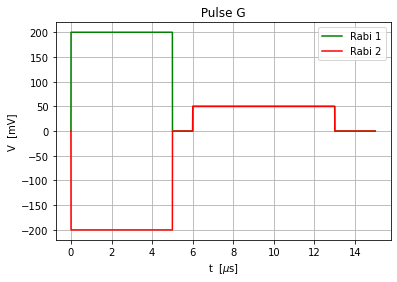

In [9]:
fig,ax= plt.subplots()

ax.grid(True)
plt.plot(ti,pl,'-g',label= 'Rabi 1')
plt.plot(mti,mpl,'-r',label= 'Rabi 2')
ax.set_ylabel('V  [mV]')
ax.set_xlabel('t  [$\mu$s]')
ax.set_title(' Pulse G ')
ax.legend(loc=0)
plt.show()
#fig.savefig('Pulse_sweep_t=20',optimize=True,bbox_inches='tight')

In [8]:
Pulses_List

[{'Name': 'Rabi',
  'Amplitude': 200,
  'Start time': 1e-10,
  'End time': 2e-10,
  'Start Duration': 5,
  'End Duration': 6,
  'Sweep time': 0,
  'Sweep Duration': 0},
 {'Name': 'Probe1',
  'Amplitude': 50,
  'Start time': 6,
  'End time': 20,
  'Start Duration': 7,
  'End Duration': 9,
  'Sweep time': 1,
  'Sweep Duration': 0}]

# Sending the Pulse information to the instrumet

In [66]:
M8190A.write('TRAC1:DEL:ALL') #Delets the stored sequences in the instrument

14

In [15]:
#Sequence for Rabi1

M8190A.write('TRAC1:IQIM 1, "C:\\Users\\a.hernandez.de.la.ve\\Documents\\GitHub\\STM\\M8190\\Puls1.csv", CSV, BOTH, ON, ALEN')

104

In [16]:
#Sequence for Rabi2

M8190A.write('TRAC1:IQIM 2, "C:\\Users\\a.hernandez.de.la.ve\\Documents\\GitHub\\STM\\M8190\\Puls2.csv", CSV, BOTH, ON, ALEN')

104

In [17]:
M8190A.query(':TRAC1:CAT?') #catalogue of the corresponding traces stored in memory

'1,108000,2,108000'

In [18]:
M8190A.write('TRAC1:SEL 2')

12

In [19]:
M8190A.write('INIT:IMM')

9

In [20]:
M8190A.write('ABOR')

5

### Animation

In [22]:
%matplotlib notebook
plt.style.use('seaborn-pastel')
fig = plt.figure()
ax = plt.axes(xlim=(-1, 32), ylim=(0, 11))
ax.grid(True)
ax.set_ylabel('V  [mV]')
ax.set_xlabel('t  [s]')
line, = ax.plot([], [], color='black')

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  Whe iterate over p and define the stopping point by the end value of frames in the anim function
def animate(i):
    y, time = Sweep(Pulses_List,100,i,32,1000)
    line.set_data(time, y)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,frames=np.linspace(0,100), interval=400, blit=True)
plt.show()

#in our case, frames should match to the total number of time steps P

<IPython.core.display.Javascript object>

## To Do:
1. Code a "Rescale voltage program" to the obtain the dserided pulse amplitude by the given voltage output of the instrument. $\checkmark$
2. Calculate the  $\Delta \tau$ and study it's relation with the sample size and sampling rate, code this relation so we can get this parameters by any given  $\Delta \tau$. Partly $\checkmark$
3. Rewrite the code, adding a dictionary for the settings of the instrument, the renormalization of the Voltage $\checkmark$ and putting the pulse function in terms of $\Delta \tau$ and t $\checkmark$
4. Implement basic sequences, then implement the intended sequence of the future experiment

In [52]:
7.2e9 * 15e-6

108000.0

In [73]:
(7.2e9)**-1

1.3888888888888888e-10

In [72]:
def Param(t,Δt):

    """This function gives the sample size N and the sampling rate Sr to be used for proper 
        pulse time scale.
        
        This function takes the desired total pulse time length and the desired time resolution
        and outputs the corresponding Sapmle size N to be used in the Sweeping function and it 
        also gives the Sample rate Sr to be set in the AWG, in order to get the proper
        time scale within the Pulse from the AWG. Everything should be in the correct units
    """
    #for the sampling rate we have 
    sr=(Δt)**-1

    #for the sample size N
    N=t*sr 

    return N,sr


In [74]:
Param(15e-6,_)

(108000.0, 7200000000.0)

In [ ]:
def InstSet(Setts):

    "Setting the instumets Votlage Amplitude and Sampling frequency, given the parameters stablished in the Setts dictionary"

    #Taking the value in milivolts from the dictionary, sets it properly in the instument. Must be within the proper interval 
    volt = Setts['Amplitude']/1000
    M8190A.write('DC1:VOLT:AMPL volt')

    #The sample frequency is now set to the specific value given in the Dictionary
    sf = Setts['CSF']
    M8190A.write('FREQ:RAST sf')



# Misc. SCPI commands

In [87]:
M8190A.query('*OPC?') #this is for checking that the previous commands were completed

'1'

In [14]:
M8190A.write('*CLS')

5

In [27]:
M8190A.write('*RST') #Reseting the instrument to factory settings

5

In [98]:
M8190A.write('TRAC1:DEL:ALL') #Delets the stored sequences in the instrument

14

In [41]:
M8190A.write('ABOR') #self explanatory

5